In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from glob import glob
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# GPU 할당 상태 확인

tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
image_dates_train_nak = glob('./train/1*.jpg')
image_dates_train_scub = glob('./train/2*.jpg')
image_dates_train_oster = glob('./train/3*.jpg')

image_dates_valid_nak = glob('./valid/1*.jpg')
image_dates_valid_scub = glob('./valid/2*.jpg')
image_dates_valid_oster = glob('./valid/3*.jpg')

image_dates_test_nak = glob('./test/1*.jpg')
image_dates_test_scub = glob('./test/2*.jpg')
image_dates_test_oster = glob('./test/3*.jpg')

class_name = ['nacksungdae','scubhome', 'osteria']
dic = {'nacksungdae' : 0, 'scubhome' : 1, 'osteria' : 2}

X_train = []
Y_train = []
X_valid = []
Y_valid = []
X_test = []
Y_test = []

for imagename in image_dates_train_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(0)
    
for imagename in image_dates_train_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(1)    
    
for imagename in image_dates_train_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(2)
    
for imagename in image_dates_valid_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(0)
    
for imagename in image_dates_valid_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(1)    
    
for imagename in image_dates_valid_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(2)
    
for imagename in image_dates_test_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(0)
    
for imagename in image_dates_test_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(1)    
    
for imagename in image_dates_test_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(2)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(9180, 200, 200, 3) (9180,)
(3060, 200, 200, 3) (3060,)
(3060, 200, 200, 3) (3060,)


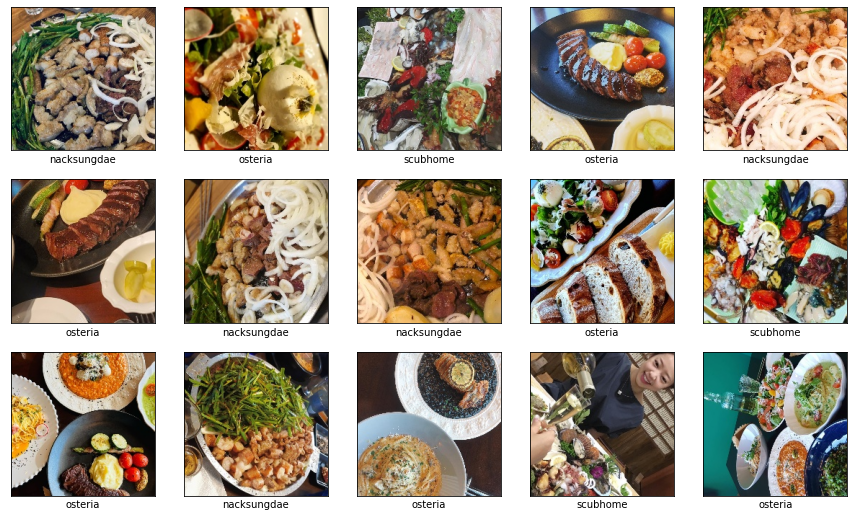

In [3]:
# train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 44)

# print(train_images.shape, test_images.shape)
# print(train_labels.shape, test_labels.shape)
%matplotlib inline 
N_TRAIN = X_train.shape[0]
N_TEST = X_valid.shape[0]

plt.figure(figsize = (15, 9))

# train data image 확인

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(X_train[img_idx])
    plt.xlabel(class_name[Y_train[img_idx]])

In [4]:
#min-max scaling

X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

x_train = X_train.reshape(-1, 200, 200, 3)
x_valid = X_valid.reshape(-1, 200, 200, 3)
x_test = X_test.reshape(-1, 200, 200, 3)

y_train = Y_train
y_test = Y_test
y_valid = Y_valid


print('train data : X ', x_train.shape, ' Y ', y_train.shape)
print('valid data : X ', x_valid.shape, ' Y ', y_valid.shape)
print('test data : X ', x_test.shape, ' Y ', y_test.shape)

train data : X  (9180, 200, 200, 3)  Y  (9180,)
valid data : X  (3060, 200, 200, 3)  Y  (3060,)
test data : X  (3060, 200, 200, 3)  Y  (3060,)


### Xception

In [5]:
from tensorflow.keras.applications import Xception

Xception_base = Xception(weights='imagenet',
                 include_top=False,        # class 3개로 분류 학습시켜야 해서 레이어 분리시킨 후, Desnse(3) 추가..?
                 input_shape=(200, 200, 3))

Xception_base.summary()

83689472/83683744 [==============================] - 7s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
__________________________

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
model_Xception = models.Sequential()
model_Xception.add(Xception_base)
model_Xception.add(layers.Flatten())
model_Xception.add(layers.Dense(256, activation='relu'))
model_Xception.add(layers.Dense(3, activation='sigmoid'))
Xception_base.trainable = False
model_Xception.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 771       
Total params: 46,552,619
Trainable params: 25,691,139
Non-trainable params: 20,861,480
_________________________________________________________________


In [22]:
model_Xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist_Xception = model_Xception.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_valid, y_valid))

Epoch 1/10
46/46 [==============================] - 23s 495ms/step - loss: 0.1157 - accuracy: 0.9598 - val_loss: 0.0814 - val_accuracy: 0.9775
Epoch 2/10
46/46 [==============================] - 22s 469ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.0791 - val_accuracy: 0.9784
Epoch 3/10
46/46 [==============================] - 22s 478ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9784
Epoch 4/10
46/46 [==============================] - 22s 482ms/step - loss: 9.0915e-04 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9778
Epoch 5/10
46/46 [==============================] - 22s 480ms/step - loss: 6.7490e-04 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9778
Epoch 6/10
46/46 [==============================] - 22s 479ms/step - loss: 5.3572e-04 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9768
Epoch 7/10
46/46 [==============================] - 22s 479ms/step - loss: 4.3984e-04 - accuracy: 1.0000 - val_loss: 0.0907 - val_

In [19]:
test_result = model.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])


96/96 [==============================] - 6s 63ms/step - loss: 0.0303 - accuracy: 0.9908
test loss:  0.03030044212937355
test acc:  0.9908496737480164


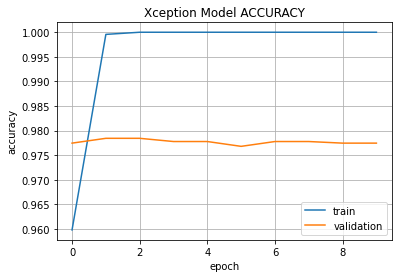

In [23]:
plt.plot(hist_Xception.history['accuracy'])
plt.plot(hist_Xception.history['val_accuracy'])
plt.title('Xception Model ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

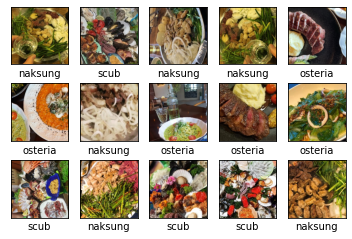

In [24]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, N_TEST)
    im = np.reshape(x_test[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(model_Xception.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_test[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)

### InceptionResNetV2

In [25]:
from tensorflow.keras.applications import InceptionResNetV2

InceptionResNetV2_base = InceptionResNetV2(weights='imagenet',
                         include_top=False,        # class 3개로 분류 학습시켜야 해서 레이어 분리시킨 후, Desnse(3) 추가..?
                         input_shape=(200, 200, 3))

InceptionResNetV2_base.summary()



219062272/219055592 [==============================] - 25s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 99, 99, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 99, 99, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization_4[0][0]      
____________

In [26]:
model_InceptionResNetV2 = models.Sequential()
model_InceptionResNetV2.add(InceptionResNetV2_base)
model_InceptionResNetV2.add(layers.Flatten())
model_InceptionResNetV2.add(layers.Dense(256, activation='relu'))
model_InceptionResNetV2.add(layers.Dense(3, activation='sigmoid'))
InceptionResNetV2_base.trainable = False
model_InceptionResNetV2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 24576)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6291712   
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 60,629,219
Trainable params: 6,292,483
Non-trainable params: 54,336,736
_________________________________________________________________


Epoch 1/10
46/46 [==============================] - 27s 579ms/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.1126 - val_accuracy: 0.9673
Epoch 2/10
46/46 [==============================] - 25s 535ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.1330 - val_accuracy: 0.9627
Epoch 3/10
46/46 [==============================] - 25s 534ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9621
Epoch 4/10
46/46 [==============================] - 25s 535ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1307 - val_accuracy: 0.9627
Epoch 5/10
46/46 [==============================] - 25s 538ms/step - loss: 8.0715e-04 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9650
Epoch 6/10
46/46 [==============================] - 25s 535ms/step - loss: 5.9446e-04 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 0.9618
Epoch 7/10
46/46 [==============================] - 25s 537ms/step - loss: 4.6770e-04 - accuracy: 1.0000 - val_loss: 0.1332 - val_accu

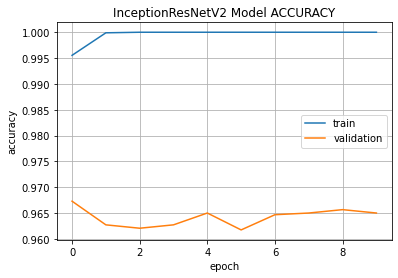

In [28]:
model_InceptionResNetV2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

hist_InceptionResNetV2 = model_InceptionResNetV2.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_valid, y_valid))

test_result = model_InceptionResNetV2.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])


plt.plot(hist_InceptionResNetV2.history['accuracy'])
plt.plot(hist_InceptionResNetV2.history['val_accuracy'])
plt.title('InceptionResNetV2 Model ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

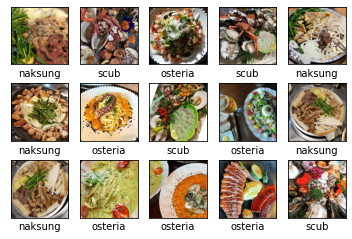

In [29]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, N_TEST)
    im = np.reshape(x_test[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(model_InceptionResNetV2.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_test[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)